In [2]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from ZilongCode.utils import get_diffusion_exponent

In [2]:
shuffle_data_dir = '/media/zilong/4TB Storage HDD/ReplayTrajectoryAnalysis/ReplayTrajectories_shuffled/ReplayTrajectories'
#load pkl file from shuffle_data_dir with name 'Cor_01_04_traj.pkl'
with open(shuffle_data_dir + '/Cor_01_04_traj.pkl', 'rb') as f:
    shuffle_traj = pickle.load(f)
    
real_data_dir = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories'
#load pkl file from real_data_dir with name 'Cor_01_04_traj.pkl'
with open(real_data_dir + '/Cor_01_04_traj.pkl', 'rb') as f:
    real_traj = pickle.load(f)

In [ ]:
#plot the first 10 trajectories in shuffle_traj and real_traj with two different colors
import matplotlib.pyplot as plt
import numpy as np

shuffle_keys = list(shuffle_traj.keys())
real_keys = list(real_traj.keys())
for i in range(30,60):
    plt.figure(figsize=(3,3))
    plt.plot(shuffle_traj[shuffle_keys[i]], color='blue', label='shuffle')
    plt.plot(real_traj[real_keys[i]], color='red', label='real')
    plt.legend()


### Get replay diffusivity

In [3]:
# geneerate shuffled replay trajectories by shuffle the value under the key 'replay_trajectory'
def position_shuffling(Replay_traj):
    """
    shuffle the replay trajectory by shuffling the decoded position under each key of Replay_traj
    Input:
        Replay_traj: the replay trajectory
    Output:
        Replay_traj_shuffled: the shuffled replay trajectory
    """
    Replay_traj_shuffled = Replay_traj.copy()
    for key in Replay_traj_shuffled.keys():
        Replay_traj_shuffled[key] = np.random.permutation(Replay_traj_shuffled[key])
    return Replay_traj_shuffled

In [6]:
# load all replay trajectory from computer
replay_folder = (
    "/media/zilong/4TB Storage HDD/ReplayTrajectoryAnalysis/ReplayTrajectories_shuffled/ReplayTrajectories"
)

# get all file with _traj.pkl
replay_files = [f for f in os.listdir(replay_folder) if f.endswith("_traj.pkl")]

# for each file, load the replay trajectory
all_exponent = []
all_exponent_shuffled = []
for replay_file in replay_files:
    # print("loading file: and calculate the diffusion exponent")
    print("load file: ", replay_file, " and calculate the diffusion exponent")
    with open(os.path.join(replay_folder, replay_file), "rb") as f:
        Replay_traj = pickle.load(f)
        exponent = get_diffusion_exponent(Replay_traj)
        all_exponent.append(exponent)

        # shuflle the replay trajectory
        Replay_traj_shuffled = position_shuffling(Replay_traj)
        exponent_shuffled = get_diffusion_exponent(Replay_traj_shuffled)
        all_exponent_shuffled.append(exponent_shuffled)

load file:  bon_03_02_traj.pkl  and calculate the diffusion exponent
load file:  bon_03_04_traj.pkl  and calculate the diffusion exponent
load file:  bon_03_06_traj.pkl  and calculate the diffusion exponent
load file:  Cor_02_04_traj.pkl  and calculate the diffusion exponent
load file:  Cor_03_02_traj.pkl  and calculate the diffusion exponent
load file:  Cor_03_04_traj.pkl  and calculate the diffusion exponent
load file:  Cor_01_02_traj.pkl  and calculate the diffusion exponent
load file:  Cor_01_04_traj.pkl  and calculate the diffusion exponent
load file:  Cor_02_02_traj.pkl  and calculate the diffusion exponent
load file:  bon_04_02_traj.pkl  and calculate the diffusion exponent
load file:  bon_04_04_traj.pkl  and calculate the diffusion exponent
load file:  bon_04_06_traj.pkl  and calculate the diffusion exponent
load file:  bon_05_04_traj.pkl  and calculate the diffusion exponent
load file:  bon_05_06_traj.pkl  and calculate the diffusion exponent
load file:  bon_06_02_traj.pkl  an

In [14]:
np.mean(all_exponent)

0.7254070769033828

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2., 12., 77.,  3.]),
 array([-5.00854998, -4.83106377, -4.65357757, -4.47609136, -4.29860515,
        -4.12111894, -3.94363273, -3.76614652, -3.58866031, -3.4111741 ,
        -3.23368789, -3.05620169, -2.87871548, -2.70122927, -2.52374306,
        -2.34625685, -2.16877064, -1.99128443, -1.81379822, -1.63631202,
        -1.45882581, -1.2813396 , -1.10385339, -0.92636718, -0.74888097,
        -0.57139476, -0.39390855, -0.21642234, -0.03893614,  0.13855007,
         0.31603628]),
 <BarContainer object of 30 artists>)

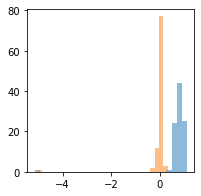

In [13]:
#plot the distrubution of all_exponent
plt.figure(figsize=(3,3))
plt.hist(all_exponent, bins=30, alpha=0.5, label='real')
plt.hist(all_exponent_shuffled, bins=30, alpha=0.5, label='shuffle')

In [6]:
# load all replay trajectory from computer
replay_folder = (
    "/media/zilong/4TB Storage HDD/ReplayTrajectoryAnalysis/ReplayTrajectories_shuffled/ReplayTrajectories"
)

# get all file with _traj.pkl
replay_files = [f for f in os.listdir(replay_folder) if f.endswith("_traj_raw_and_shuffle.pkl")]

# for each file, load the replay trajectory
all_exponent = []
all_exponent_shuffled = []
for replay_file in replay_files:
    # print("loading file: and calculate the diffusion exponent")
    print("load file: ", replay_file, " and calculate the diffusion exponent")
    with open(os.path.join(replay_folder, replay_file), "rb") as f:
        all_replay_traj = pickle.load(f)
        #load real replay trajectory        
        real_replay_traj = all_replay_traj['real']
        exponent = get_diffusion_exponent(real_replay_traj)
        all_exponent.append(exponent)

        #load shuffled replay trajectory which is all other keys except 'real'
        keys = list(all_replay_traj.keys())
        keys.remove('real')
        shuffled_replay_traj = {}
        for key in keys:
            shuffled_replay_traj = all_replay_traj[key]
            exponent_shuffled = get_diffusion_exponent(shuffled_replay_traj)
            all_exponent_shuffled.append(exponent_shuffled)




load file:  Cor_01_02_traj_raw_and_shuffle.pkl  and calculate the diffusion exponent


In [7]:
all_exponent_shuffled

[0.6545150024809026,
 0.44269828642578324,
 0.3050775268103195,
 0.5126050880249706,
 0.37877979603131695,
 0.6711031812414826,
 0.4912658958790773,
 0.5251082510990064,
 0.5866389670639117,
 0.6604131840050553,
 0.6125998807405144,
 0.47166239335637383,
 0.5737361848049558,
 0.6117749704198339,
 0.6045959076000174,
 0.5615432076049627,
 0.39689682646891994,
 0.3545819995056014,
 0.6384122785196262,
 0.3205929362795117,
 0.45605859993589876,
 0.5600469408572238,
 0.32420709104295853,
 0.438785188663197,
 0.40936579123399774,
 0.5212189455901904,
 0.4156996420595152,
 0.5122188357941947,
 0.4736325769552718,
 0.45578017683804517,
 0.44652063926860436,
 0.27180039954026575,
 0.4258748881325849,
 0.26973914336642957,
 0.46424110562797616,
 0.4869314207910602,
 0.5006584371924258,
 0.5543599854242294,
 0.5348870853451033,
 0.3685698979604297,
 0.33907352766976023,
 0.5739449901888367,
 0.36385073883584623,
 0.4149774680857094,
 0.3180251416676553,
 0.45178377134454956,
 0.3692386113730859,

In [8]:
all_exponent

[0.5988986143028342]